In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics #this model used to evalutate the model

In [45]:
car_dataset = pd.read_csv("Car_dataset.csv")
car_dataset.head()




,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [46]:
car_dataset.shape

(4340, 8)

In [72]:
car_dataset.info
car_dataset.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel              int64
seller_type       int64
transmission      int64
owner            object
dtype: object

In [48]:
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [49]:
car_dataset.fuel.value_counts()


fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [50]:
car_dataset.seller_type.value_counts()

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

In [51]:
car_dataset.transmission.value_counts()

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

In [53]:
car_dataset.replace({"fuel":{"Petrol":0,"Diesel":1,"CNG":2,"LPG":3,"Electric":4}},inplace=True)

In [55]:
car_dataset.replace({"seller_type":{"Individual":0,"Dealer":1,"Trustmark Dealer":2}},inplace=True)

In [57]:
car_dataset.replace({"transmission":{"Manual":0,"Automatic":1}},inplace=True)

In [58]:
car_dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,0,0,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,0,0,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,0,0,0,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,0,0,First Owner


In [86]:
car_dataset=car_dataset.drop(["owner"],axis=1)
X = car_dataset.drop(["name","selling_price"],axis=1)
Y = car_dataset["selling_price"]

In [87]:
car_dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission
0,Maruti 800 AC,2007,60000,70000,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0
...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,0,0
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,0,0
4337,Maruti 800 AC BSIII,2009,110000,83000,0,0,0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,0,0


In [121]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [90]:
lin_reg_model = LinearRegression()

In [92]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [96]:
training_data_prediction = lin_reg_model.predict(X_train)

In [98]:
error_score = metrics.r2_score(Y_train,training_data_prediction)

In [99]:
error_score

0.4323074381176102

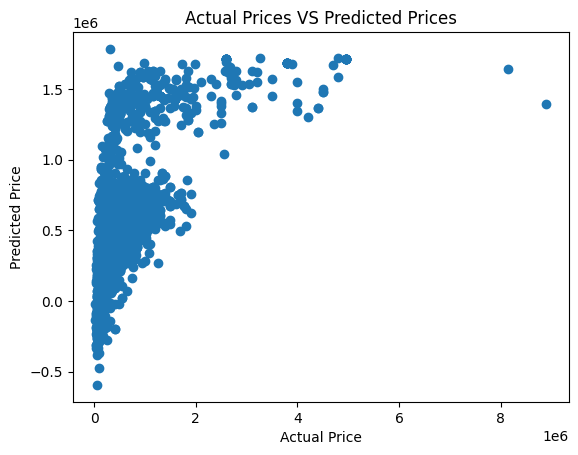

In [101]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

In [122]:
test_data_prediction = lin_reg_model.predict(X_test)

In [123]:
error_score = metrics.r2_score(Y_test,test_data_prediction)

In [124]:
error_score

0.5131403641447752

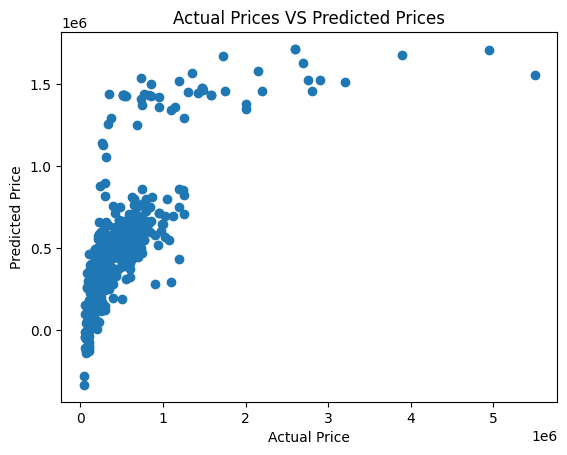

In [126]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Predicted Prices")
plt.show()